# Packages Used

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi

print("packages imported")

packages imported


# Problem Statement

Construct a deterministic mathematical model that describes how the concentrations of the four major greenhouse gases, namely, carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), and water vapour (H2O) change over time in Earth’s atmosphere.
The model must account for natural (volcanoes, wetlands, oceans, plants) processes that add or remove these gases, forming a dynamic balance that governs atmospheric greenhouse gas levels.

# Variables and Parameters

| Description | Symbol | Units | Dimensions | Type | Value |
| --- | ---| --- | --- | --- | --- |
| concentration of $CO_2$ | $C$ | $\text{ppm}$ | $1$ | dependent variable | N/A |
| concentration of $CH_4$ | $M$ | $\text{ppm}$ | $1$ | dependent variable | N/A |
| concentration of $N_2 O$ | $N$ | $\text{ppm}$ | $1$ | dependent variable | N/A |
| concentration of $H_2 O$ | $W$ | $\text{ppm}$ | $1$ | dependent variable | N/A |
| time | $t$ | $\text{years}$ | $T$ | independent variable | N/A |
| volcanic source rates of $CO_2$, $H_2 O$ | $V_c$, $V_w$ | $\frac{\text{ppm}}{\text{years}}$ | $\frac{1}{T}$ | parameter | $0.036^{[15,19]}$, $0.2^{[4]}$ |
| wetland source rates of $CO_2$, $CH_4$, $N_2 O$ | $W_c$, $W_m$, $W_n$ | $\frac{\text{ppm}}{\text{years}}$ | $\frac{1}{T}$ | parameter | $0.58^{[18]}$, $0.00458^{[18]}$, $0.00004^{[20]}$ |
| net evaporation source rate of $H_2 O$ | $E_w$ | $\frac{\text{ppm}}{\text{years}}$ | $\frac{1}{T}$ | parameter | $25.291^{[7,9]}$ |
| loss rate of methane by oxidation | $X_m$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter | $0.083^{[11]}$ |
| ocean absorption rate for $CO_2$, $N_2 O$ | $O_c$, $O_n$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter | $0.0028^{[6]}$, $0.0031^{[2]}$|
| plant uptake rate for $CO_2$ | $P_c$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter | $0.08^{[8,5,16]}$ |
| precipitation removal rate of $H_2 O$ | $R_w$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter | $24.23^{[12,3,17,19]}$ |
| initial concentration of $CO_2$, $CH_4$, $N_2O$, $H_2O$ | $C_0, M_0, N_0, W_0$ | $\text{ppm}$ | $1$ | constant | $422.8^{[10]}$, $1.92^{[13,14]}$, $0.33^{[14]}$, $4000^{[1]}$ |

# Assumptions and Constraints

- The atmosphere is well-mixed, meaning spatial variations are neglected.
- Source and sink rates are constant over time (can be modified for future scenarios).
- Methane oxidation follows a first-order decay law with fixed stoichiometry:
$$CH_4 + 2 O_2 \rightarrow CO_2 + 2 H_2 O$$
- Oxygen concentration is large and effectively constant
- Biological and oceanic absorption processes act as linear relaxations toward equilibrium states.
- The model neglects short-term weather variability, focusing on multi-year to decadal trends.
- Atmospheric temperature and pressure are constant.
- No anthropogenic factors (fossil fuels, agriculture, industry) are included.
- Greenhouse gases produced or removed by human activities are ignored.
- The atmosphere is a closed system.
- The atmosphere is only one layer and it has a constant volume.
- All coefficients are constant in time, that is, they don't vary seasonally or by year.
- Temperature and pressure and constant so no Clausius–Clapeyron relation (thermodynamic relationship that describes the change in vapor pressure of a substance with temperature), carbonate-chemistry temperature feedbacks, and cloud microphysics are ignored.

# Building the Solution

We treat the atmosphere as a single, well-mixed box. For each greenhouse gas, the rate of change of its concentration equals **sources minus sinks**.

**$CO_2$ balance**

Natural sources add $CO_2$ through volcanic and wetland emissions at rates $(V_c)$ and $(W_c)$.  
Oxidation of methane produces one molecule of $CO_2$ per $CH_4$, contributing an additional source $(+X_m M)$.  
CO₂ is removed by plants and oceans with first-order rates $(P_c)$ and $(O_c)$.  
Hence,

$$ \frac{dC}{dt} = V_c + W_c + X_m M - (P_c + O_c)\,C $$

**$CH_4$ balance**

Methane is supplied by wetlands $(W_m)$ and lost through oxidation with rate $(X_m M)$:

$$ \frac{dM}{dt} = W_m - X_m\,M  $$

**$N_2 O$ balance**

Nitrous oxide is emitted from wetlands $(W_n)$ and absorbed by the ocean at rate $(O_n N)$:

$$ \frac{dN}{dt} = W_n - O_n\,N $$


**$H_2 O$ balance**

Water vapour has sources from volcanic activity $(V_w)$, net evaporation $(E_w)$,  
and production from methane oxidation (2 $H_2 O$ per $CH_4$ oxidized, giving $(+2X_m M)$.  
It is removed by precipitation at rate $(R_w W)$:

$$ \frac{dW}{dt} = V_w + E_w + 2X_m\,M - R_w\,W$$


# Non-dimensionalization

We use the dimensional system to start and use non-dimensional variables $C^*, M^*, N^*, W^*, t^*$.

On substituting them into the governing equation and simplifying, that is, dividing the respective equations by the coefficients of the derivative we get,

\begin{equation}
\begin{aligned}
\frac{dC^*}{dt^*} &= V_c\frac{[t]}{[C]} + W_c\frac{[t]}{[C]} 
+ X_m\frac{[M][t]}{[C]}M^* - (P_c + O_c)[t]C^*, \\
\frac{dM^*}{dt^*} &= W_m\frac{[t]}{[M]} - X_m[t]M^*, \\
\frac{dN^*}{dt^*} &= W_n\frac{[t]}{[N]} - O_n[t]N^*, \\
\frac{dW^*}{dt^*} &= V_w\frac{[t]}{[W]} + E_w\frac{[t]}{[W]} 
+ 2X_m\frac{[M][t]}{[W]}M^* - R_w[t]W^*.
\end{aligned}
\end{equation}

Now, we choose the time scale. Let 

$$
[t] = \frac{1}{P_c + O_c}.
$$

Let the concentration scales be

$$
[C] = \frac{V_c + W_c}{P_c + O_c}, \quad
[M] = \frac{W_m}{P_c + O_c}, \quad
[N] = \frac{W_n}{P_c + O_c}, \quad
[W] = \frac{V_w + E_w}{P_c + O_c}.
$$

**Therefore, the final non-dimensionalized form is**

\begin{equation}
\begin{aligned}
\frac{dC^*}{dt^*} &= 1 + 
\frac{X_m W_m}{(V_c + W_c)(P_c + O_c)}M^* - C^*, \\
\frac{dM^*}{dt^*} &= 1 - 
\frac{X_m}{P_c + O_c}M^*, \\
\frac{dN^*}{dt^*} &= 1 - 
\frac{O_n}{P_c + O_c}N^*, \\
\frac{dW^*}{dt^*} &= 1 + 
\frac{2X_m W_m M^*}{(P_c + O_c)(V_w + E_w)} - 
\frac{R_w}{P_c + O_c}W^*.
\end{aligned}
\end{equation}

where the initial conditions are as follows:

$$
C^*(0) = \frac{C_0(P_c + O_c)}{V_c + W_c}, \quad
M^*(0) = \frac{M_0(P_c + O_c)}{W_m}, \quad
N^*(0) = \frac{N_0(P_c + O_c)}{W_n}, \quad
W^*(0) = \frac{W_0(P_c + O_c)}{V_w + E_w}.
$$

# Simulation

In [3]:
Vc, Vw = 0.036, 0.2                    # volcano source rates
Wc, Wm, Wn = 0.58, 0.00458, 0.00004           # wetland source rates
Ew = 25.291                             # evaporation source rate
Xm = 1/12                             # methane oxidation rate
Oc, On = 0.00288, 0.00312                    # ocean absorbtion rate
Pc = 0.08                             # plant uptake rate
Rw = 24.233                             # precipitation removal rate
C0, M0, N0, W0 = 422.9, 1.92, 0.33, 4000.  # initial gas concentrations

# nondimensionalized parameters

C_units = (Vc+Wc)/(Oc+Pc)
M_units = Wm/(Oc+Pc)
N_units = Wn/(Oc+Pc)
W_units = (Vw+Ew)/(Oc+Pc)

alpha = Xm/(Vc+Wc) * M_units
beta = Xm/(Oc+Pc)
gamma = On/(Oc+Pc)
omega = 2*Xm/(Vw+Ew) * M_units
sigma = Rw/(Oc+Pc)

C_star0 = C0 / C_units
M_star0 = M0 / M_units
N_star0 = N0 / N_units
W_star0 = W0 / W_units

In [4]:
# u[0] = C*, u[1] = M*, u[2] = N*, u[3] = W*
def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = 1 + alpha*u[1] - u[0]
    dudt[1] = 1 - beta*u[1]
    dudt[2] = 1 - gamma*u[2]
    dudt[3] = 1 + omega*u[1] - sigma*u[3]
    return dudt

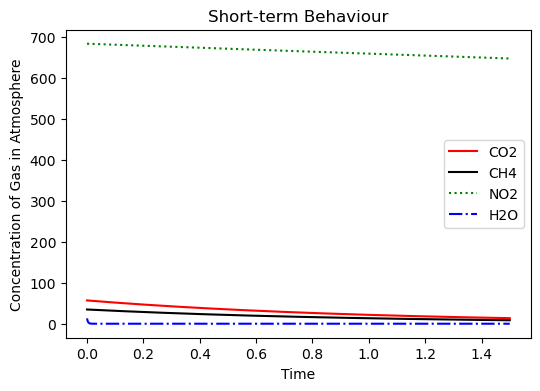

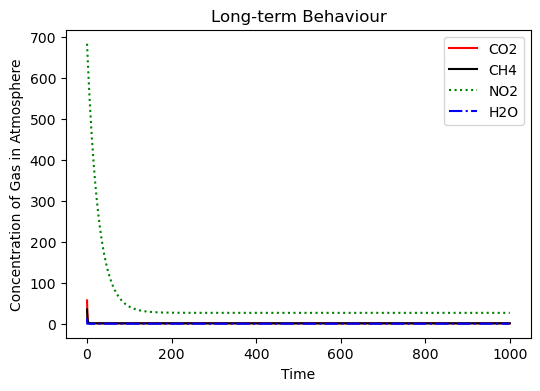

In [11]:
u0 = [C_star0, M_star0, N_star0, W_star0]
t = np.linspace(0,1.5,1000)
u = spi.odeint(f,u0,t)

plt.figure(figsize=(6,4))
plt.plot(t,u[:,0],'r')
plt.plot(t,u[:,1],'-k')
plt.plot(t,u[:,2],':g')
plt.plot(t,u[:,3],'-.b')
plt.title('Short-term Behaviour')
plt.xlabel('Time')
plt.ylabel('Concentration of Gas in Atmosphere')
plt.legend(['CO2','CH4','NO2','H2O'])
plt.show()

u0 = [C_star0, M_star0, N_star0, W_star0]
t = np.linspace(0,1000,10000)
u = spi.odeint(f,u0,t)

plt.figure(figsize=(6,4))
plt.plot(t,u[:,0],'r')
plt.plot(t,u[:,1],'-k')
plt.plot(t,u[:,2],':g')
plt.plot(t,u[:,3],'-.b')
plt.title('Long-term Behaviour')
plt.xlabel('Time')
plt.ylabel('Concentration of Gas in Atmosphere')
plt.legend(['CO2','CH4','NO2','H2O'])
plt.show()

# Analyze and Assess

**What do we understand from the plot we made?**

Our simulation shows that under constant source and sink rates, the four major greenhouse gases asymptotically approach a steady-state solution. If human processes that greatly accelerate gas concentration increases were considered, the model would likely not stabilize.

H2O declines sharply and remains nearly constant because rapid precipitation balances its large evaporation rate. CO2 and CH4 decay faster than N2O because of the large sink rate relative to their source rates, while N2O declines slowly and stabilizes above zero because the sink rate is much lower relative to its source rate by multiple orders of magnitude. 

To make a more accurate model, the assumption that all sink rates are constant should be removed, as a sink’s carrying capacity alters the uptake rate of gases based on how much it has already absorbed. Another point to consider is that the atmosphere has variable pressure and temperature, which means that gases do not mix instantaneously, resulting in uneven concentrations. A more complex model that captures spatial information will be needed.

# Bibliography

1. “ATMO336 - Fall 2015.” Www.atmo.arizona.edu, 2015, [www.atmo.arizona.edu/students/courselinks/fall16/atmo336/lectures/sec1/composition.html](http://www.atmo.arizona.edu/students/courselinks/fall16/atmo336/lectures/sec1/composition.html).

2. de la Paz, M., Velo, A., Steinfeldt, R., & Pérez, F. F. 2025. “The unaccounted oceanic sink of anthropogenic nitrous oxide and its relationship with anthropogenic carbon dioxide.” Global Biogeochemical Cycles, 39, e2024GB008417. [https://doi.org/10.1029/2024GB008417](https://doi.org/10.1029/2024GB008417)

3. Duursma, Ek, and Mprm Boisson. “Global Oceanic and Atmospheric Oxygen Stability Considered in Relation to the Carbon-Cycle and to Different Time Scales.” Oceanologica Acta, vol. 17, no. 2, 1994, pp. 117–141, archimer.ifremer.fr/doc/00099/21024/. Accessed 22 Oct. 2025.

4. “Geological Society - Volcanic Gases.” Www.geolsoc.org.uk, 2013, www.geolsoc.org.uk/ks3/gsl/education/resources/rockcycle/page3601.html.

5. GONZALEZ-MELER, M. A., et al. “Plant Respiration and Elevated Atmospheric CO2 Concentration: Cellular Responses and Global Significance.” Annals of Botany, vol. 94, no. 5, 8 Sept. 2004, pp. 647–656, www.ncbi.nlm.nih.gov/pmc/articles/PMC4242210/, https://doi.org/10.1093/aob/mch189.

6. Gruber, Nicolas, et al. “The Oceanic Sink for Anthropogenic CO2 from 1994 to 2007.” Science, vol. 363, no. 6432, 14 Mar. 2019, pp. 1193–1199, www.science.org/doi/10.1126/science.aau5153, https://doi.org/10.1126/science.aau5153.

7. Haynes, W.M. “CRC Handbook of Chemistry and Physics: 1st Student Edition.” Biochemical Education, vol. 17, no. 2, Apr. 1989, p. 103, https://doi.org/10.1016/0307-4412(89)90022-8.

8. Lai, Jiameng, et al. “Terrestrial Photosynthesis Inferred from Plant Carbonyl Sulfide Uptake.” Nature, vol. 634, no. 855-861, 16 Oct. 2024, https://doi.org/10.1038/s41586-024-08050-3. Accessed 31 Oct. 2024.

9. “Lake Evaporation on the Rise.” Earthobservatory.nasa.gov, 12 July 2022, earthobservatory.nasa.gov/images/150067/lake-evaporation-on-the-rise.

10. Lindsey, Rebecca. “Climate Change: Atmospheric Carbon Dioxide.” Climate.gov, National Oceanic and Atmospheric Administration, 21 May 2025, www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide.

11. Mitloehner, Frank. “Why Methane from Cattle Warms the Climate Differently than CO2 from Fossil Fuels.” CLEAR Center, 7 July 2020, clear.ucdavis.edu/explainers/why-methane-cattle-warms-climate-differently-co2-fossil-fuels.

12. National Oceanic and Atmospheric Administration. “The Hydrologic Cycle.” Www.noaa.gov, 24 Mar. 2023, www.noaa.gov/jetstream/atmosphere/hydro.

13. NOAA. “Global Monitoring Laboratory - Carbon Cycle Greenhouse Gases.” Gml.noaa.gov, 6 Mar. 2023, gml.noaa.gov/ccgg/trends_ch4/.

14. NOAA. “The Atmosphere.” National Oceanic and Atmospheric Administration, 14 Apr. 2023, www.noaa.gov/jetstream/atmosphere.

15. Observatory, Deep Carbon. “Scientists Quantify Global Volcanic CO2 Venting; Estimate Total Carbon on Earth.” Phys.org, 1 Oct. 2019, phys.org/news/2019-10-scientists-quantify-global-volcanic-co2.html.

16. Pandey, Sudhanshu, et al. “Reduction in Earth’s Carbon Budget Imbalance.” Nature Communications, vol. 16, no. 1, 24 July 2025, pmc.ncbi.nlm.nih.gov/articles/PMC12289909/, https://doi.org/10.1038/s41467-025-61588-2. Accessed 22 Oct. 2025.

17. Patterson, J B, and E C Morris. “Measurement of Absolute Water Density, 1 °c to 40 °C.” Metrologia, vol. 31, no. 4, 1 Jan. 1994, pp. 277–288, https://doi.org/10.1088/0026-1394/31/4/001.

18. Sjögersten, Sofie, et al. “Tropical Wetlands: A Missing Link in the Global Carbon Cycle?” Global Biogeochemical Cycles, vol. 28, no. 12, Dec. 2014, pp. 1371–1386, www.ncbi.nlm.nih.gov/pmc/articles/PMC4461074/, https://doi.org/10.1002/2014gb004844.

19. Trenberth, Kevin E., and Lesley Smith. “The Mass of the Atmosphere: A Constraint on Global Analyses.” Journal of Climate, vol. 18, no. 6, 15 Mar. 2005, pp. 864–875, [https://doi.org/10.1175/jcli-3299.1](https://doi.org/10.1175/jcli-3299.1).

20. Li, Y., Tian, H., Yao, Y. et al. Increased nitrous oxide emissions from global lakes and reservoirs since the pre-industrial era. Nat Commun 15, 942 (2024). https://doi.org/10.1038/s41467-024-45061-0